Using the Iris Flowers Dataset, build and Neural Network with the following specifications to
perform multi-class classification.
•
•
•
Split the Data into Training: Validation: Testing = 80:10:10
Number of Hidden Layers = 2, containing 8 Neurons and 4 Neurons
Use RELU activation function in the hidden layers, choose the optimizer as ADAM and set
learning rate to be equal to 0.1.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as pplot

2025-08-06 16:26:53.130982: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-06 16:26:53.140553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754477813.151746 1008537 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754477813.155388 1008537 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754477813.164079 1008537 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
df = pd.read_csv("dataset_q1_iris.csv")
df.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
x = df.drop('Iris-setosa',axis = 1).values
y = df['Iris-setosa'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_onehot = tf.keras.utils.to_categorical(y_encoded)

X_train, X_temp, y_train, y_temp = train_test_split(x, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#preprocessed and split the data into training, validation and test


In [6]:
model_iris = Sequential([
    Dense(8, activation='relu', input_shape=(x.shape[1],)),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax') 
])

optimizer = Adam(learning_rate=0.01)
model_iris.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_iris = model_iris.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=2)

#Built the model and compiled it for training 

/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754477848.913242 1008537 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1205 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/50


I0000 00:00:1754477849.782348 1010156 service.cc:152] XLA service 0x7fdc4801a080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754477849.782364 1010156 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-06 16:27:29.797396: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754477849.872647 1010156 cuda_dnn.cc:529] Loaded cuDNN version 91100
I0000 00:00:1754477850.456953 1010156 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 - 2s - 229ms/step - accuracy: 0.2941 - loss: 1.0724 - val_accuracy: 0.3333 - val_loss: 0.9941
Epoch 2/50
8/8 - 0s - 8ms/step - accuracy: 0.3361 - loss: 0.9727 - val_accuracy: 0.2667 - val_loss: 0.9269
Epoch 3/50
8/8 - 0s - 8ms/step - accuracy: 0.5630 - loss: 0.9095 - val_accuracy: 0.6667 - val_loss: 0.8690
Epoch 4/50
8/8 - 0s - 8ms/step - accuracy: 0.6471 - loss: 0.8502 - val_accuracy: 0.6667 - val_loss: 0.8028
Epoch 5/50
8/8 - 0s - 8ms/step - accuracy: 0.6639 - loss: 0.7892 - val_accuracy: 0.6667 - val_loss: 0.7547
Epoch 6/50
8/8 - 0s - 8ms/step - accuracy: 0.6639 - loss: 0.7422 - val_accuracy: 0.6667 - val_loss: 0.7201
Epoch 7/50
8/8 - 0s - 8ms/step - accuracy: 0.6639 - loss: 0.7063 - val_accuracy: 0.6667 - val_loss: 0.6852
Epoch 8/50
8/8 - 0s - 8ms/step - accuracy: 0.6639 - loss: 0.6725 - val_accuracy: 0.6667 - val_loss: 0.6559
Epoch 9/50
8/8 - 0s - 7ms/step - accuracy: 0.6807 - loss: 0.6432 - val_accuracy: 0.6667 - val_loss: 0.6297
Epoch 10/50
8/8 - 0s - 7ms/step - accuracy: 0.

In [7]:
test_loss, test_acc = model_iris.evaluate(X_test, y_test, verbose=0)
print(f"Iris Test Accuracy: {test_acc:.4f}")

model_iris.summary()
#The summary of the model showing total parameters and its accuracy

Iris Test Accuracy: 1.0000


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

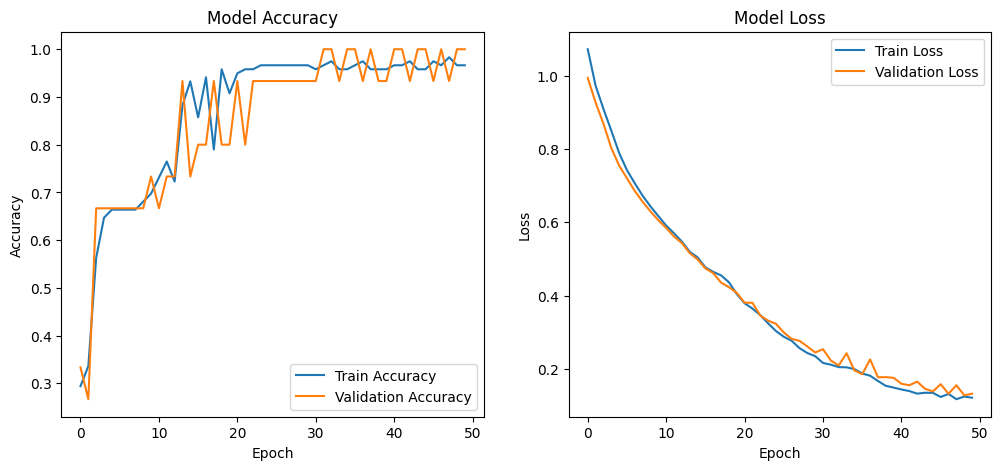

In [8]:
#ploting the model's accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_iris.history['accuracy'], label='Train Accuracy')
plt.plot(history_iris.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_iris.history['loss'], label='Train Loss')
plt.plot(history_iris.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
